In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8958b145ec2a8884b7f22d60e4aa843


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | puri
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | ucluelet
Processing Record 14 of Set 1 | leh
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | bonthe
Processing Record 19 of Set 1 | porto velho
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mataura
Processing Recor

Processing Record 38 of Set 4 | coihaique
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | kuytun
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | henties bay
Processing Record 43 of Set 4 | fernley
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | puerto colombia
Processing Record 46 of Set 4 | joshimath
Processing Record 47 of Set 4 | saint-francois
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | burla
Processing Record 50 of Set 4 | panama city
Processing Record 1 of Set 5 | nabulao
Processing Record 2 of Set 5 | khasan
Processing Record 3 of Set 5 | lashio
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | west bay
Processing Record 7 of Set 5 | kidal
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | xuddur
Processing Record 10 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 5 |

Processing Record 25 of Set 8 | tommot
Processing Record 26 of Set 8 | pochutla
Processing Record 27 of Set 8 | carnarvon
Processing Record 28 of Set 8 | manaure
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | ponta pora
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | abha
Processing Record 33 of Set 8 | yantal
Processing Record 34 of Set 8 | kahului
Processing Record 35 of Set 8 | yeppoon
Processing Record 36 of Set 8 | mount gambier
Processing Record 37 of Set 8 | rurrenabaque
Processing Record 38 of Set 8 | ntcheu
Processing Record 39 of Set 8 | west richland
Processing Record 40 of Set 8 | wairoa
Processing Record 41 of Set 8 | rayadrug
Processing Record 42 of Set 8 | cabra
Processing Record 43 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 44 of Set 8 | thinadhoo
Processing Record 45 of Set 8 | suchil
Processing Record 46 of Set 8 | panalingaan
Processing Record 47 of Set 8 | general pico
Processing Recor

Processing Record 15 of Set 12 | malwan
City not found. Skipping...
Processing Record 16 of Set 12 | artyom
Processing Record 17 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 18 of Set 12 | lagos
Processing Record 19 of Set 12 | fare
Processing Record 20 of Set 12 | tamale
Processing Record 21 of Set 12 | jaguaruna
Processing Record 22 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 23 of Set 12 | cacapava do sul
Processing Record 24 of Set 12 | oussouye
Processing Record 25 of Set 12 | hami
Processing Record 26 of Set 12 | takhtamygda
Processing Record 27 of Set 12 | antanifotsy
Processing Record 28 of Set 12 | santa cruz
Processing Record 29 of Set 12 | colares
Processing Record 30 of Set 12 | bonavista
Processing Record 31 of Set 12 | nebug
Processing Record 32 of Set 12 | port macquarie
Processing Record 33 of Set 12 | pinhao
Processing Record 34 of Set 12 | asau
Processing Record 35 of Set 12 | rahimatpur
Processing Record 36 of Set 12 | gat
P

In [10]:
len(city_data)

571

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.0170,-97.5169,59.68,82,100,10.83,US,2022-02-07 01:55:23
1,Hermanus,-34.4187,19.2345,63.90,92,87,3.89,ZA,2022-02-07 02:04:41
2,Avarua,-21.2078,-159.7750,82.45,78,40,17.27,CK,2022-02-07 02:04:42
3,Tura,25.5198,90.2201,56.55,69,0,1.88,IN,2022-02-07 01:55:49
4,Punta Arenas,-53.1500,-70.9167,53.71,82,75,6.91,CL,2022-02-07 02:04:12
5,Bluff,-46.6000,168.3333,61.81,64,0,12.01,NZ,2022-02-07 02:04:43
6,Albany,42.6001,-73.9662,20.05,76,10,2.93,US,2022-02-07 02:00:15
7,Puri,19.8000,85.8500,59.52,57,93,3.80,IN,2022-02-07 02:04:43
8,Saint-Philippe,-21.3585,55.7679,78.39,85,91,13.87,RE,2022-02-07 02:04:44
9,Butaritari,3.0707,172.7902,82.60,74,86,15.48,KI,2022-02-07 02:04:44


In [12]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2022-02-07 01:55:23,28.0170,-97.5169,59.68,82,100,10.83
1,Hermanus,ZA,2022-02-07 02:04:41,-34.4187,19.2345,63.90,92,87,3.89
2,Avarua,CK,2022-02-07 02:04:42,-21.2078,-159.7750,82.45,78,40,17.27
3,Tura,IN,2022-02-07 01:55:49,25.5198,90.2201,56.55,69,0,1.88
4,Punta Arenas,CL,2022-02-07 02:04:12,-53.1500,-70.9167,53.71,82,75,6.91
...,...,...,...,...,...,...,...,...,...
566,Teya,RU,2022-02-07 02:20:39,60.3778,92.6267,-1.30,100,94,2.66
567,Caruray,PH,2022-02-07 02:20:39,10.3094,119.0128,81.19,74,88,11.12
568,Turbiv,UA,2022-02-07 02:20:40,49.3479,28.7212,33.57,80,100,12.10
569,Zhangjiakou,CN,2022-02-07 02:20:40,40.8100,114.8794,18.32,45,100,4.05


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

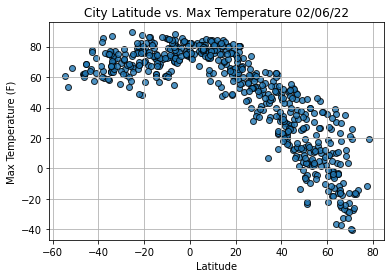

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

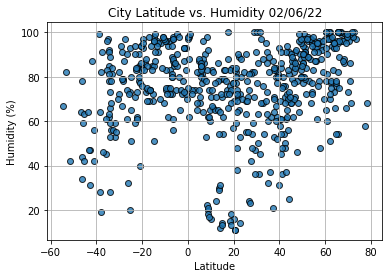

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

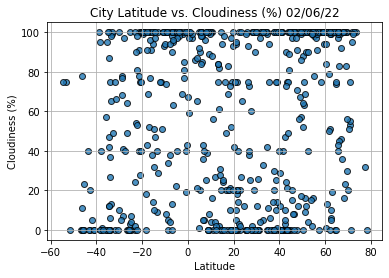

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

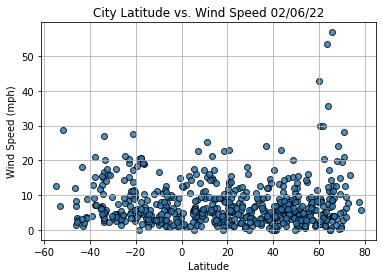

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                          Leh
Country                        IN
Date          2022-02-07 02:04:45
Lat                       34.1667
Lng                       77.5833
Max Temp                     6.73
Humidity                       95
Cloudiness                    100
Wind Speed                   1.95
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
566     True
567     True
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2022-02-07 01:55:23,28.0170,-97.5169,59.68,82,100,10.83
3,Tura,IN,2022-02-07 01:55:49,25.5198,90.2201,56.55,69,0,1.88
6,Albany,US,2022-02-07 02:00:15,42.6001,-73.9662,20.05,76,10,2.93
7,Puri,IN,2022-02-07 02:04:43,19.8000,85.8500,59.52,57,93,3.80
9,Butaritari,KI,2022-02-07 02:04:44,3.0707,172.7902,82.60,74,86,15.48
...,...,...,...,...,...,...,...,...,...
566,Teya,RU,2022-02-07 02:20:39,60.3778,92.6267,-1.30,100,94,2.66
567,Caruray,PH,2022-02-07 02:20:39,10.3094,119.0128,81.19,74,88,11.12
568,Turbiv,UA,2022-02-07 02:20:40,49.3479,28.7212,33.57,80,100,12.10
569,Zhangjiakou,CN,2022-02-07 02:20:40,40.8100,114.8794,18.32,45,100,4.05


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2022-02-07 01:55:23,28.0170,-97.5169,59.68,82,100,10.83
3,Tura,IN,2022-02-07 01:55:49,25.5198,90.2201,56.55,69,0,1.88
6,Albany,US,2022-02-07 02:00:15,42.6001,-73.9662,20.05,76,10,2.93
7,Puri,IN,2022-02-07 02:04:43,19.8000,85.8500,59.52,57,93,3.80
9,Butaritari,KI,2022-02-07 02:04:44,3.0707,172.7902,82.60,74,86,15.48


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

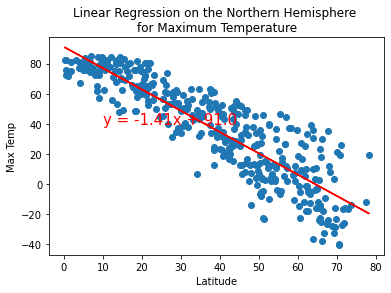

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

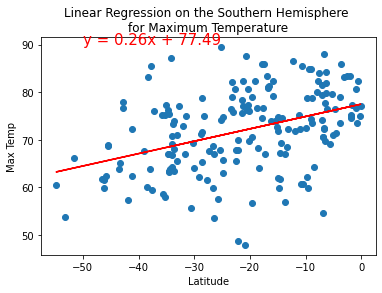

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

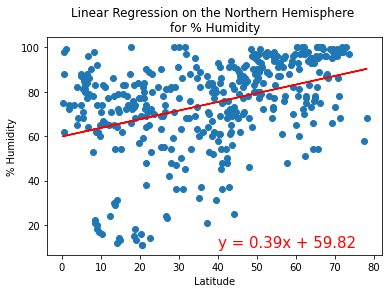

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

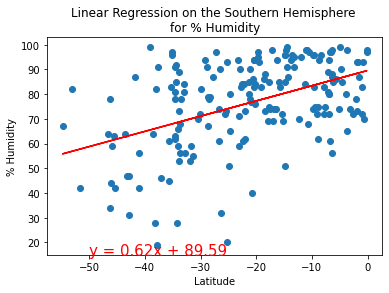

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

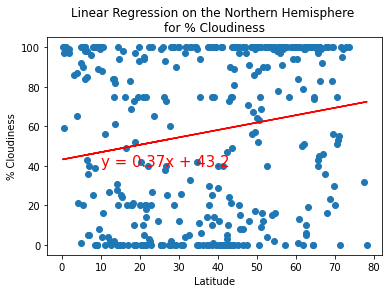

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(10,40))

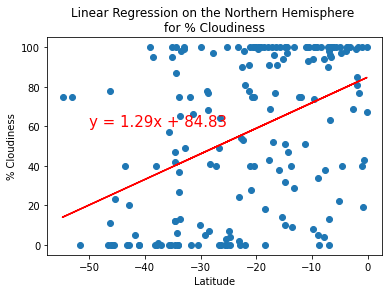

In [32]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-50,60))

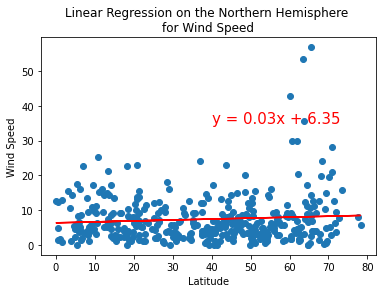

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

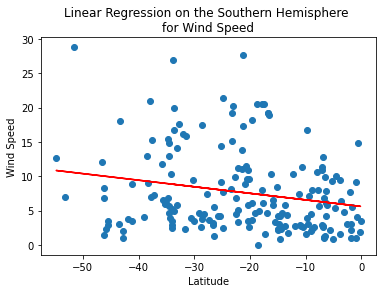

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))
